In [1]:
import pathlib
import copy
import numpy as np
import scipy.io.wavfile as wav
from itertools import chain

from typing import Callable, Union, Tuple, List
from abc import abstractmethod, abstractproperty

import pandas as pd
import json
import pickle
import argparse
import matplotlib.pyplot as plt

from uk.data import GuitarStringData, GuitarBodyData, AFloat, AInt, ACallableFloat
from uk.structure import GuitarString, GuitarBody, Force, ForceRamp, ForceNull, ModalSimulation
from util.util import load_data_json, load_data_csv

In [2]:
%matplotlib notebook

In [3]:
path = "out/12-02/lite-test/spreadsheets/"
outpath = "out/07-02/modes-50-10_rigid_finger-03/"
string_path = "config/uk/guitar_string_config.json"
sim_config_path = "config/uk/simulation_config.json"

In [4]:
string = GuitarString(load_data_json(string_path, cls=GuitarStringData))

In [5]:
sim = load_data_json(sim_config_path, cls=ModalSimulation)

In [6]:
t = np.arange(sim.nb_steps)*sim.h

In [7]:
y = np.zeros((sim.nb_steps, ))

In [8]:
y_n = np.zeros((len(sim.n[0]), ))

In [9]:
x_vis = 0.9

In [10]:
with open(path + 'q_n.pkl', 'rb') as f:
    i = 0
    while 1:
        try:
            q_n = pickle.load(f)[1]
            y_n = string.y_n(q_n, sim.n[0])
            for j in range(len(y_n)):
                y[i] += y_n[j](string.data.l * x_vis)
            i += 1
        except EOFError:
            break

<IPython.core.display.Javascript object>


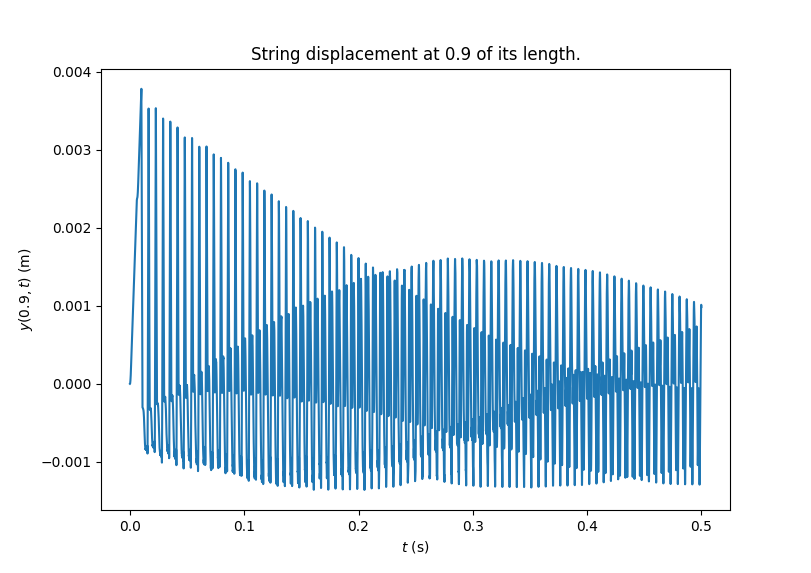

In [11]:
plt.figure()
plt.plot(t, y)
plt.xlabel("$t$ (s)")
plt.ylabel(f"$y({x_vis}, t)$ (m)")
plt.title(f"String displacement at {x_vis} of its length.")
plt.show()

In [54]:
nb_points = 1000
x = np.linspace(0, string.data.l, nb_points)
t = np.arange(q_n.shape[1])*2e-5

In [55]:
%matplotlib notebook

In [56]:
xx = np.outer(x, np.ones_like(t))
tt = np.outer(np.ones_like(x), t)
y = np.zeros_like(xx)

In [ ]:
for j in range(len(y_n)):
    y_j = y_n[j](xx)
    y += y_j

In [12]:
%matplotlib notebook

In [ ]:
plt.ioff()
for t_step in t[::100]:
    t_step = int(t_step/1e-4)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y[:, t_step])
    ax.set_ylim(-1e-4, 1e-4)
    ax.set_title(f"String at time {t_step*1e-4:.2f}")
    ax.set_xlabel("$x$ (m)")
    ax.set_ylabel("$y$ (m)")
    plt.savefig(outpath + f"gif/y_{t_step:05}.png")
#plt.show()

In [10]:
y.shape

(2000, 10001)

<IPython.core.display.Javascript object>


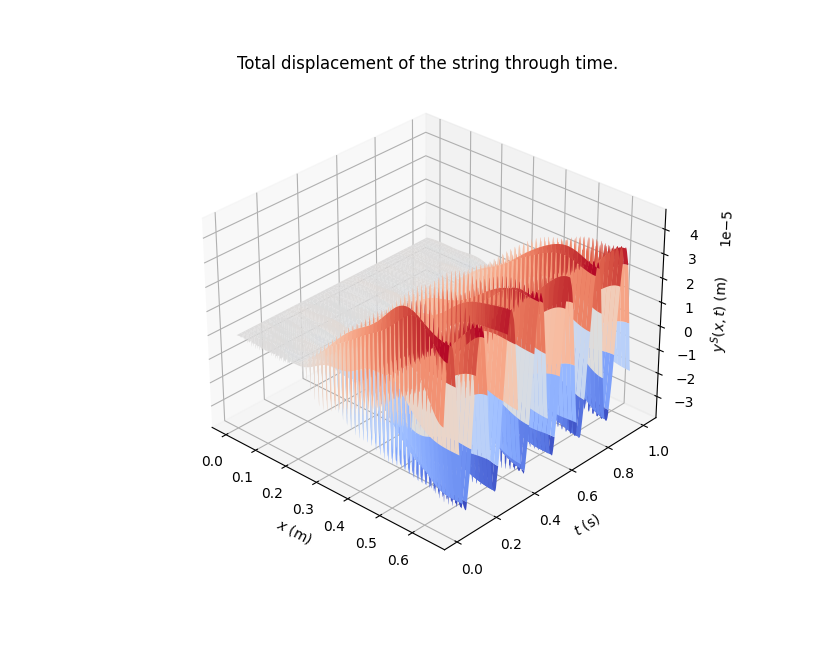

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection="3d")
surf = ax.plot_surface(xx[:,100:], tt[:,100:], y[:,100:], cmap='coolwarm')
ax.set_title("Total displacement of the string through time.")
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$t$ (s)")
ax.set_zlabel("$y^S(x, t)$ (m)")

plt.show()